## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: PPGEE0023 - Attribute Extraction

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

---


## Code for the Spectrogram of a Coldplay Music (Yellow):

Perform the time-frequency analyses described below:

1. Generate the spectrogram, comment on it, and analyze the results by comparing them with the playback of the music.
2. Analyze the signal using the DWT with 5 levels of decomposition. Use two different mother wavelet functions and compare the results. Compare the results with those obtained in the previous item.
3. Apply the HHT to the audio signal and compare the results obtained with those from the previous items.

Link of the Music (Yellow - Coldplay): https://drive.google.com/file/d/1kZFU98kHOombg0rfJf0JQdYP7f1-Ajti/view?usp=drive_link

---




## Spectrogram of the Music:

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


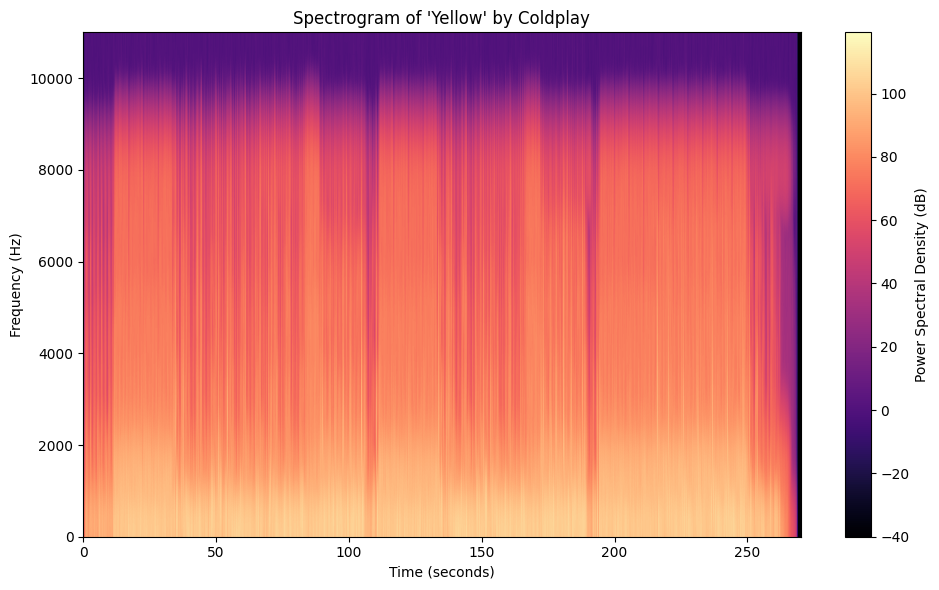

In [ ]:
# Install the necessary libraries
!pip install pydub  # Install the pydub library for audio processing
!apt-get install ffmpeg  # Install ffmpeg, required for manipulating audio files

# Importing the necessary libraries
import matplotlib.pyplot as plt  # Library for plotting graphs
import numpy as np  # Library for efficient numerical operations
from pydub import AudioSegment  # Library for reading and processing audio files
from scipy.signal.windows import gaussian  # Function to create a Gaussian window
from scipy.fft import fft  # Function to calculate the Fast Fourier Transform

# Load the audio file '10.Yellow.mp3' from the content directory
audio_path = '/content/10.Yellow.mp3'  # Specify the path to the MP3 file
audio = AudioSegment.from_file(audio_path, format='mp3')  # Load the audio file
cutting_time = 270 # Song cut-off time for analysis
# IMPORTANT: The original audio has 270 seconds

# Convert the audio to numerical samples
x = np.array(audio.get_array_of_samples())  # Get the audio samples as a NumPy array
audio_trimmed = audio[:(cutting_time*1000)]  # Trim the audio to the first cutting_time seconds
sr = audio.frame_rate  # Get the sampling rate (number of samples per second)

# The rest of the code remains the same
N = len(x)  # Total number of samples in the audio signal
T_x = 1 / sr  # Sampling period based on the audio sampling rate

# Define the standard deviation for the Gaussian window
g_std = 12  # Standard deviation for the Gaussian window in terms of samples

# Create a symmetric Gaussian window
mfft = 2048  # Window size (number of samples for each FFT)
gauss_size = mfft  # Size of the Gaussian window
win = gaussian(gauss_size, std=g_std, sym=True)  # Generate a Gaussian window of size mfft

# Define the parameters for the Short-Time Fourier Transform (STFT)
hop_length = 512  # Setting the hop length for the FFT window

# Perform the Short-Time Fourier Transform (STFT)
# Create the spectrogram by iterating over audio windows
num_frames = 1 + int((N - mfft) / hop_length)  # Total number of frames in the STFT
Sx2 = np.empty((mfft//2 + 1, num_frames))  # Initialize an array to store the FFT results

# Loop over the audio frames to calculate the FFT on windows
for i in range(num_frames):
    start_idx = i * hop_length  # Starting index of the window
    end_idx = start_idx + mfft  # Ending index of the window
    windowed_signal = x[start_idx:end_idx] * win  # Apply the Gaussian window to the signal
    fft_result = fft(windowed_signal, n=mfft)  # Calculate the FFT of the windowed signal
    Sx2[:, i] = np.abs(fft_result[:mfft//2 + 1])**2  # Store the power spectrum

# Calculate the total time in seconds for each frame of the STFT
frame_times = np.arange(num_frames) * hop_length / sr  # Calculate the times corresponding to the frames

# Create a figure and axis for plotting
fig1, ax1 = plt.subplots(figsize=(10, 6))  # Create a plot with size 10x6 inches

# Time and frequency limits for the plot
time_extent = (0, cutting_time)  # Limited to the 125-second segment
freq_extent = (0, sr / 2)  # Maximum frequency is half the sampling rate (Nyquist Theorem)

# Set the title and labels for the plot
ax1.set_title("Spectrogram of 'Yellow' by Coldplay")  # Title of the plot
ax1.set(xlabel="Time (seconds)", ylabel="Frequency (Hz)")  # Axis labels
ax1.set_ylim([0, 11000])  # Frequency range for the plot (0 to 11 kHz)

# Convert the spectrogram data to decibels (dB) for better visualization
Sx_dB = 10 * np.log10(np.maximum(Sx2, 1e-4))  # Convert the power spectrum to logarithmic scale (dB)

# Plot the spectrogram as an image on the plot
im1 = ax1.imshow(Sx_dB, origin='lower', aspect='auto', cmap='magma',  # Plot the spectrogram
                 extent=[time_extent[0], time_extent[1], freq_extent[0], freq_extent[1]])

# Add a color bar to show the power spectral density in dB
fig1.colorbar(im1, label='Power Spectral Density (dB)')  # Color bar indicating the spectral density

# Adjust the layout of the plot to ensure everything fits well
fig1.tight_layout()  # Adjust the figure layout

# Display the plot
plt.show()  # Show the final plot to the user


### **Code Analysis:**
This code is designed to process an audio file named "10.Yellow.mp3" and generate a spectrogram, which visually represents the spectrum of frequencies in the audio over time. It begins by installing the necessary libraries for audio processing, specifically pydub for handling audio files and ffmpeg for manipulating audio formats. After importing relevant libraries, such as matplotlib for plotting, numpy for numerical operations, and functions from scipy for creating Gaussian windows and performing Fast Fourier Transform (FFT), it proceeds to load the audio file from a specified path.

Once the audio is loaded, the code converts the audio into numerical samples and retrieves the sampling rate, indicating how many samples are captured per second. It then calculates the total number of audio samples and sets the sampling period based on the sampling rate. To analyze the audio using the Short-Time Fourier Transform (STFT), the code defines the parameters for the analysis, including the size of the Gaussian window and the hop length, which determines how much the window moves with each iteration.

As the code iterates through the audio signal in overlapping windows, it applies the Gaussian window to each segment and computes the FFT for that window. The resulting power spectrum is stored in an array for each segment of the audio. Subsequently, it calculates the corresponding time for each frame of the STFT.

With the audio data processed, the code sets up a plot to display the spectrogram. It adjusts the plot’s dimensions, titles, and axis labels while converting the power spectrum data into a logarithmic scale in decibels for improved visualization. The spectrogram is then displayed using a color map that represents the power spectral density. Finally, the layout of the plot is adjusted for clarity, and the spectrogram is shown to the user, providing a detailed view of how the audio's frequency content changes over time.

---

### **Music Spectrum Analysis:**

The analysis of the spectrogram of Coldplay's song "Yellow" reveals important characteristics about the distribution of frequencies and the intensity of sound over time. The lower frequencies, ranging from 0 to 1000 Hz, show a significant concentration of energy, indicating the predominant presence of instruments such as the bass guitar and the kick drum. This harmonic foundation is typical of many pop songs, giving the track a weight and depth that are easily perceptible in the spectrogram, where these frequencies appear with high intensity, evidenced by warm colors like orange and yellow.

In the mid frequencies, between 1000 and 5000 Hz, we find the vocals and melodic instruments. Chris Martin's voice, especially in the softer parts, is a constant presence, as are the guitars that stand out in the introduction and during the arpeggios. The spectrogram in this range maintains a smooth transition between yellow and orange colors, suggesting a good balance between the mid and low frequencies, with no major variations, indicating consistent instrumentation throughout the song.

The higher frequencies, above 5000 Hz, show a much lower energy density. Here, the more subtle elements, such as cymbals and vocal harmonics, are more discrete. The reduced energy presence in this range is indicated by darker tones, such as purple, which contributes to the song's smoothness and calmness. This characteristic reinforces the idea that "Yellow" is not a song centered on high frequencies, maintaining a more balanced sound.

Temporally, the energy distribution across the spectrogram is quite stable, reflecting the repetitive and constant nature of the music. The visible variations around 150 and 250 seconds may be associated with dynamic changes, such as the entry or exit of instruments, or variations in vocal emphasis that occur in the more exciting sections of the song, and the preparation for the final part (with the final turn of the song at 250 seconds), where the entire melodic arrangement gradually fades, focusing only on the mid and low frequencies to conclude the piece.

In summary, the spectrogram of "Yellow" reveals a typical pop-rock sound structure, with a strong presence of low and mid frequencies supporting both the vocals and the instruments. The absence of intense high frequencies and the small variations over time highlight the melodic and emotional nature of the song, which focuses more on emotional progression than on complex dynamics. This engaging and simple sound is a hallmark of music production that aims to emphasize lyrics and continuous rhythms.

---

## Discrete Wavelet Transform:

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


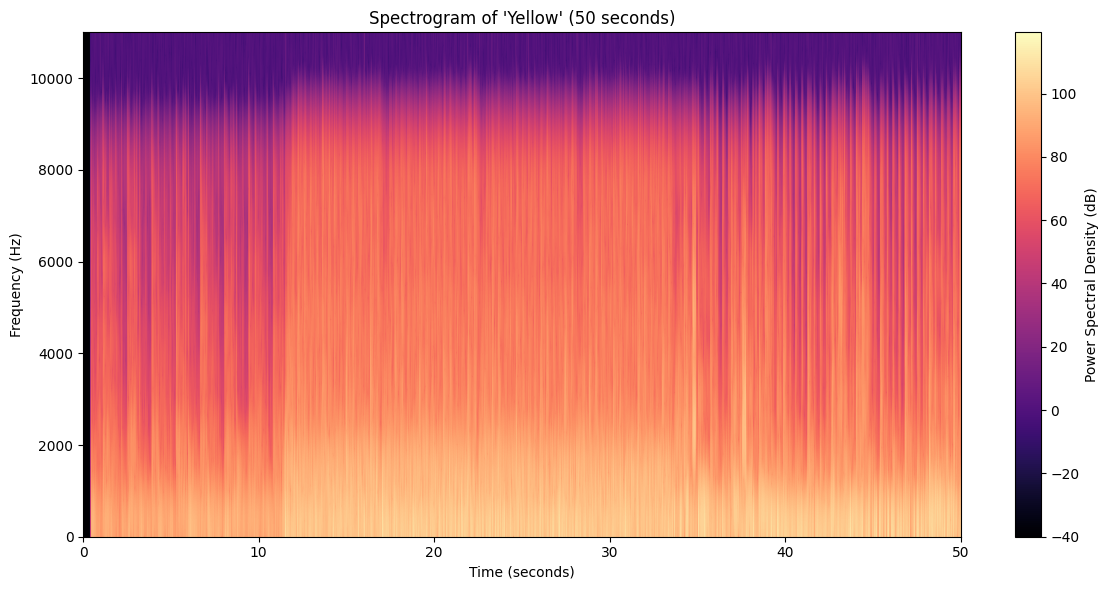

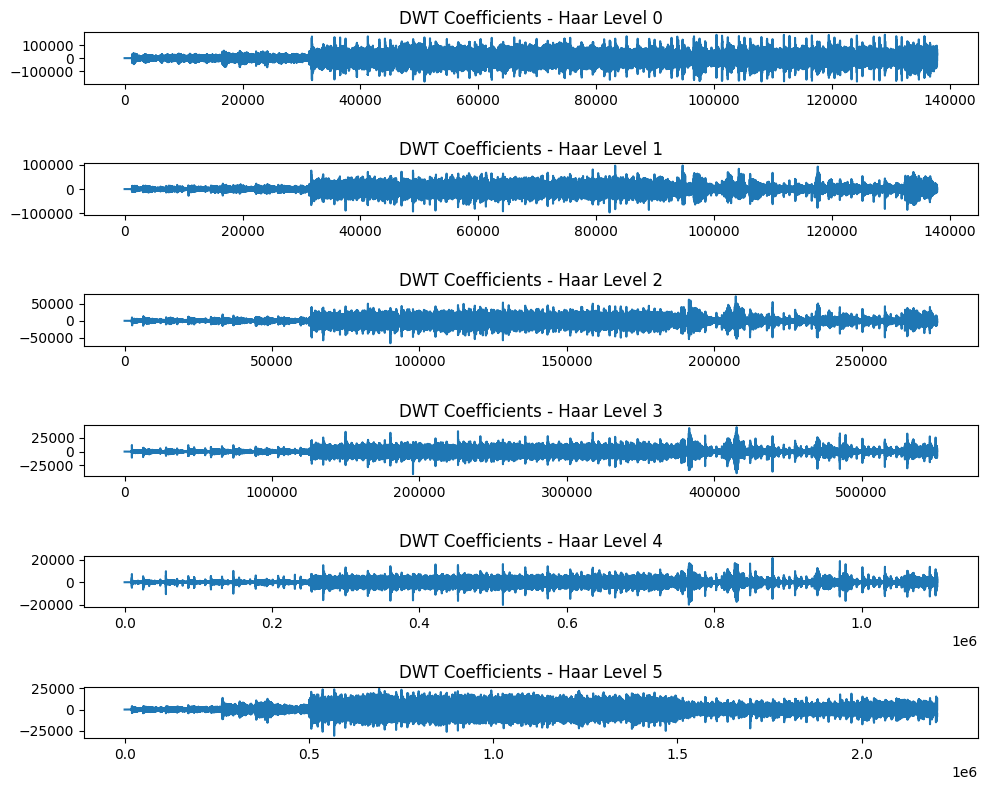

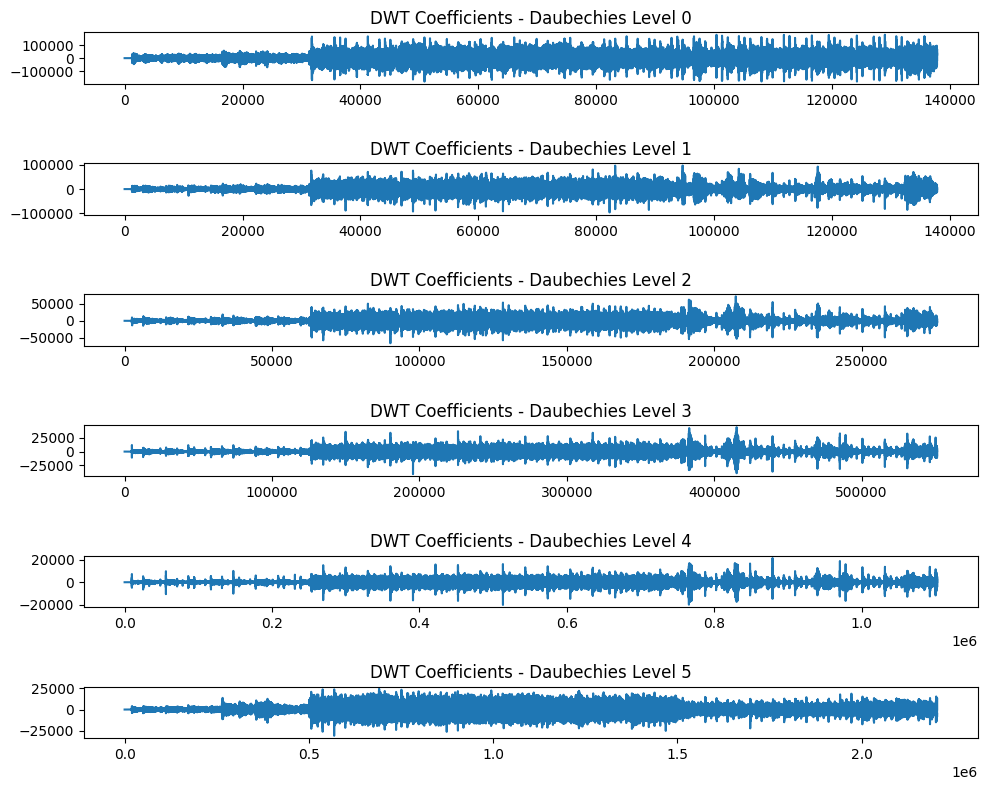

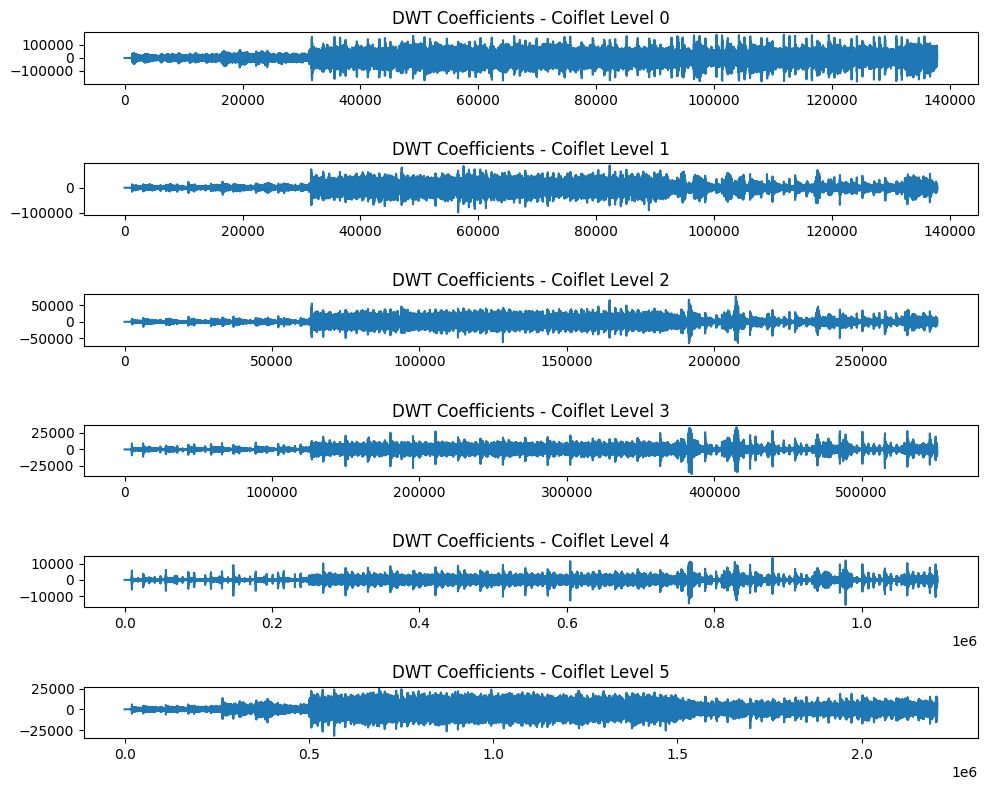

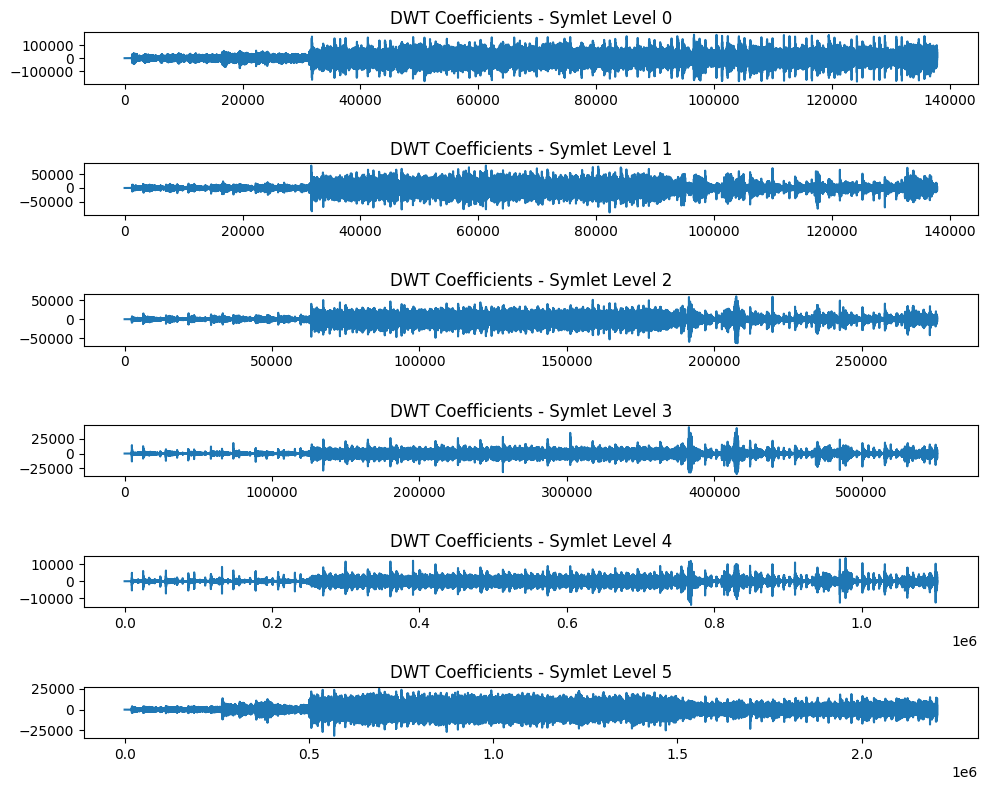

In [ ]:
# Install the necessary libraries
!pip install pydub PyWavelets scipy  # Libraries for audio processing and signal analysis
!apt-get install ffmpeg  # Installs ffmpeg for audio format support

# Importing the necessary libraries
import matplotlib.pyplot as plt  # Library for plotting graphs
import numpy as np  # Library for numerical operations
from pydub import AudioSegment  # Library for loading and manipulating audio files
from scipy.signal.windows import gaussian  # Function to create a Gaussian window
from scipy.fft import fft  # FFT function from SciPy for frequency analysis
import pywt  # Library for Wavelet Transform
from scipy.signal import hilbert  # Imports the Hilbert Transform function

# Load the audio file '10.Yellow.mp3' from the content directory
audio_path = '/content/10.Yellow.mp3'  # Specify the path to the MP3 file
audio = AudioSegment.from_file(audio_path, format='mp3')  # Loads the audio file
cutting_time = 50 # Song cut-off time for analysis

# Convert the audio to an array of samples and trim to 125 seconds
sr = audio.frame_rate  # Get the sampling rate of the audio
audio_trimmed = audio[:(cutting_time*1000)]  # Trim the audio to the first cutting_time seconds
x = np.array(audio_trimmed.get_array_of_samples())  # Gets the audio data as a NumPy array

# The rest of the code remains the same
N = len(x)  # Total number of samples in the trimmed audio signal
T_x = 1 / sr  # Sampling period based on the audio sampling rate

# Define the standard deviation for the Gaussian window
g_std = 12  # Standard deviation for the Gaussian window in terms of samples

# Create a symmetric Gaussian window
mfft = 2048  # Window size (number of samples for each FFT)
gauss_size = mfft  # Size of the Gaussian window
win = gaussian(gauss_size, std=g_std, sym=True)  # Generate a Gaussian window of size mfft

# Define the Short-Time Fourier Transform (STFT) parameters
hop_length = 512  # Ideal hop length for this audio

# Perform the Short-Time Fourier Transform
num_frames = 1 + int((N - mfft) / hop_length)  # Total number of frames in the STFT
Sx2 = np.empty((mfft // 2 + 1, num_frames))  # Initializes the matrix to store STFT results

for i in range(num_frames):
    start_idx = i * hop_length  # Starting index of the current window
    end_idx = start_idx + mfft  # Ending index of the current window
    windowed_signal = x[start_idx:end_idx] * win  # Applies the Gaussian window to the signal
    fft_result = fft(windowed_signal, n=mfft)  # Performs the FFT on the signal window
    Sx2[:, i] = np.abs(fft_result[:mfft // 2 + 1])**2  # Stores the power spectral density

# Calculate the total time in seconds for each STFT frame
frame_times = np.arange(num_frames) * hop_length / sr  # Creates an array of times for each frame

# Create a figure and axis to plot
fig1, ax1 = plt.subplots(figsize=(12, 6))  # Creates a larger graph (12x6 inches)

# Time and frequency limits for the graph
time_extent = (0, cutting_time)  # Limited to the 125-second segment
freq_extent = (0, sr / 2)  # Maximum frequency for the Y-axis

# Set the title and labels for the graph
ax1.set_title("Spectrogram of 'Yellow' ({} seconds)".format(cutting_time))  # Title of the graph
ax1.set(xlabel="Time (seconds)", ylabel="Frequency (Hz)")  # Axis labels
ax1.set_ylim([0, 11000])  # Frequency range for this track (up to 11 kHz)

# Convert the spectrogram data to decibels (dB) for better visualization
Sx_dB = 10 * np.log10(np.maximum(Sx2, 1e-4))  # Avoids -inf in the log scale

# Plot the spectrogram as an image on the graph
im1 = ax1.imshow(Sx_dB, origin='lower', aspect='auto', cmap='magma',
                 extent=[time_extent[0], time_extent[1], freq_extent[0], freq_extent[1]])

# Add a color bar to show the power spectral density in dB
fig1.colorbar(im1, label='Power Spectral Density (dB)')  # Color bar

# Adjust the layout of the graph to ensure everything fits well
fig1.tight_layout()  # Adjusts the layout of the graph

# Display the graph
plt.show()  # Shows the graph

print('')

# --------------------------------------------------------------
# Implementation of the DWT with 5 levels of decomposition

# Define the mother wavelet functions
wavelet1 = 'haar'   # First mother wavelet function (Haar)
wavelet2 = 'db1'    # Second mother wavelet function (Daubechies)
wavelet3 = 'coif1'  # Third mother wavelet function (Coiflet)
wavelet4 = 'sym2'   # Fourth mother wavelet function (Symlet)
n_level = 5  # Number of the level for the DWT

# DWT decomposition
coeffs1 = pywt.wavedec(x, wavelet1, level=n_level)  # Decomposition using Haar
coeffs2 = pywt.wavedec(x, wavelet2, level=n_level)  # Decomposition using Daubechies
coeffs3 = pywt.wavedec(x, wavelet3, level=n_level)  # Decomposition using Coiflet
coeffs4 = pywt.wavedec(x, wavelet4, level=n_level)  # Decomposition using Symlet

# Plotting the DWT results for each wavelet
wavelet_list = [('Haar', coeffs1), ('Daubechies', coeffs2), ('Coiflet', coeffs3), ('Symlet', coeffs4)]
for wavelet_name, coeffs in wavelet_list:
    fig, axs = plt.subplots(len(coeffs), 1, figsize=(10, 8))  # Creates a figure with subplots for the coefficients
    for i, coeff in enumerate(coeffs):
        axs[i].plot(coeff)  # Plots the coefficients of each level
        axs[i].set_title(f'DWT Coefficients - {wavelet_name} Level {i}')  # Title for each subplot
    plt.tight_layout()  # Adjusts the layout of the figure
    plt.show()  # Shows the DWT results for each wavelet
    print('')


### **Discrete Wavelet Transform:**

The Discrete Wavelet Transform (DWT) is a technique that allows for the decomposition of a signal into different frequency levels, providing a multiresolution analysis. The decomposition levels range from 0 to 5, with each capturing different characteristics of the signal.

At Level 0, we have the original signal, where no decomposition occurs. This means that all frequency components are present, encompassing the entire range of frequencies of the original signal.

At Level 1, decomposition begins to separate the frequencies into approximations and details. Here, the approximations correspond to low frequencies, representing the overall structure or trend of the signal. The details, in turn, capture the high frequencies, reflecting abrupt changes or finer characteristics of the signal.

Level 2 maintains this logic, but the approximations and details captured come from Level 1. The low-frequency components still represent lower characteristics, while the details now include slightly higher frequencies.

As we move to Level 3, the approximations capture even lower frequencies, while the details start to include higher frequencies that represent less pronounced characteristics of the signal.

At Level 4, the focus shifts to very low frequencies in the approximations, while the details capture higher frequencies, albeit in a reduced manner compared to previous levels.

Finally, Level 5 extracts the approximations that correspond to the lowest frequency components of the signal. The details, in this case, capture higher frequencies, but in a much more subtle and less detailed way.

In summary, the lower decomposition levels (0 to 2) are responsible for capturing higher components and details of the signal, with the approximations at higher levels representing global characteristics. In contrast, the higher levels (3 to 5) focus on capturing lower frequencies and less pronounced details, allowing for a more subtle analysis of the signal. This multiresolution approach is essential for better understanding the properties of an audio signal.

---

## Hilbert Transform:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


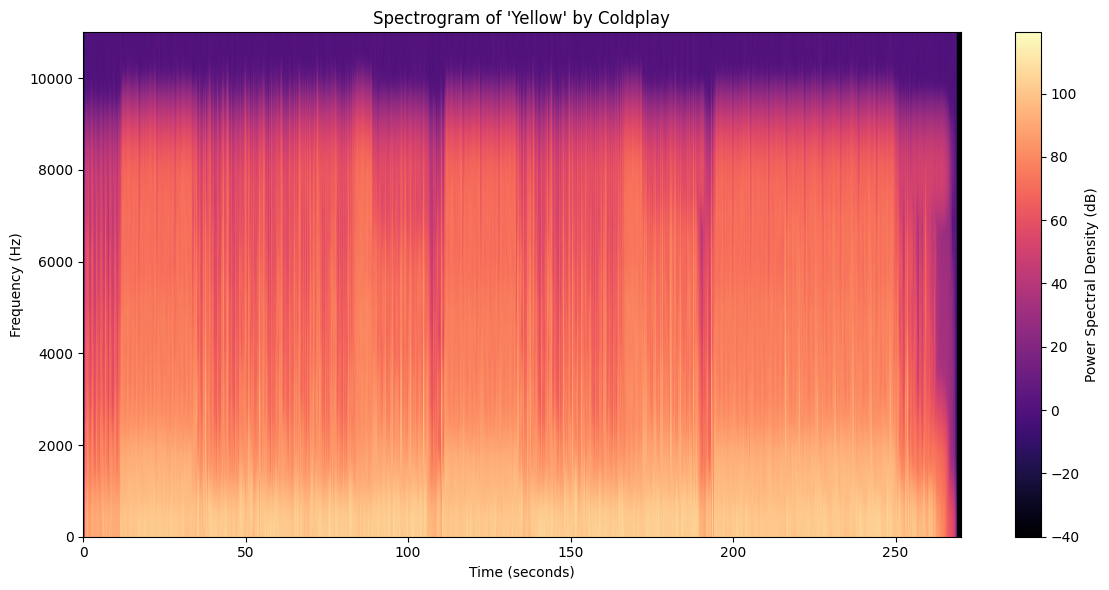

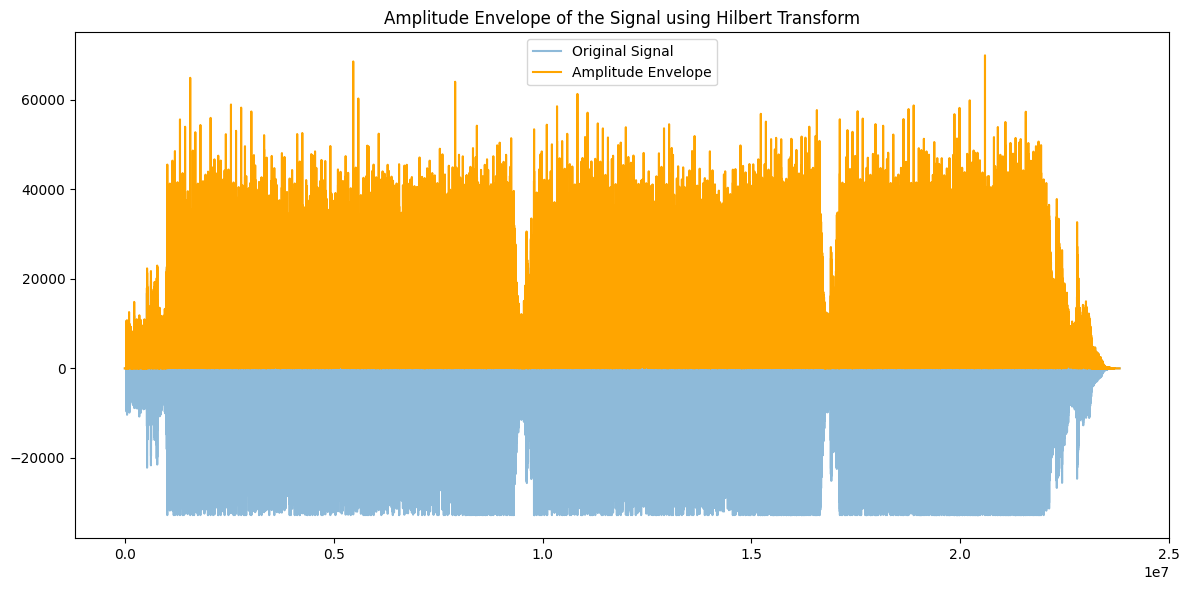

In [ ]:
# Install the necessary libraries
!pip install pydub PyWavelets scipy
!apt-get install ffmpeg

# Importing the necessary libraries
import matplotlib.pyplot as plt  # Library for plotting graphs
import numpy as np  # Library for numerical operations
from pydub import AudioSegment  # Library for audio processing
from scipy.signal.windows import gaussian  # Function to create a Gaussian window
from scipy.fft import fft  # SciPy FFT function
import pywt  # Library for Wavelet
from scipy.signal import hilbert  # Import the Hilbert Transform function

# Load the audio file '10.Yellow.mp3' from the content directory
audio_path = '/content/10.Yellow.mp3'  # Specify the path to the MP3 file
audio = AudioSegment.from_file(audio_path, format='mp3')

# Convert audio to samples
x = np.array(audio.get_array_of_samples())
sr = audio.frame_rate  # Get the sampling rate

# Rest of the code remains the same
N = len(x)  # Total number of samples in the audio signal
T_x = 1 / sr  # Sampling period based on the audio sample rate

# Define the standard deviation for the Gaussian window
g_std = 12  # Standard deviation for the Gaussian window in terms of samples

# Create a symmetric Gaussian window
mfft = 2048  # Window size (number of samples for each FFT)
gauss_size = mfft  # Size of the Gaussian window
win = gaussian(gauss_size, std=g_std, sym=True)  # Generate a Gaussian window of size mfft

# Define the Short-Time Fourier Transform (STFT) parameters
hop_length = 512  # Ideal hop length for this audio

# Perform the Short-Time Fourier Transform
# Create the spectrogram by iterating over audio windows
num_frames = 1 + int((N - mfft) / hop_length)
Sx2 = np.empty((mfft//2 + 1, num_frames))

for i in range(num_frames):
    start_idx = i * hop_length
    end_idx = start_idx + mfft
    windowed_signal = x[start_idx:end_idx] * win
    fft_result = fft(windowed_signal, n=mfft)
    Sx2[:, i] = np.abs(fft_result[:mfft//2 + 1])**2

# Calculate the total time in seconds for each STFT frame
frame_times = np.arange(num_frames) * hop_length / sr

# Create a figure and axis for plotting
fig1, ax1 = plt.subplots(figsize=(12, 6))  # Create a larger plot (10x6 inches)

# Time and frequency limits for the plot
time_extent = (0, audio.duration_seconds)  # Adjusted to the total audio duration
freq_extent = (0, sr / 2)

# Set the title and labels for the plot
ax1.set_title("Spectrogram of 'Yellow' by Coldplay")
ax1.set(xlabel="Time (seconds)", ylabel="Frequency (Hz)")
ax1.set_ylim([0, 11000])  # Frequency range for this track

# Convert spectrogram data to decibels (dB) for better visualization
Sx_dB = 10 * np.log10(np.maximum(Sx2, 1e-4))  # Avoid -inf in the log scale

# Plot the spectrogram as an image on the plot
im1 = ax1.imshow(Sx_dB, origin='lower', aspect='auto', cmap='magma',
                 extent=[time_extent[0], time_extent[1], freq_extent[0], freq_extent[1]])

# Add a color bar to show the power spectral density in dB
fig1.colorbar(im1, label='Power Spectral Density (dB)')

# Adjust the plot layout to ensure everything fits well
fig1.tight_layout()

# Display the plot
plt.show()
print('')

# --------------------------------------------------------------
# Apply Hilbert Transform to the audio signal

analytic_signal = hilbert(x)  # Calculate the analytic signal
amplitude_envelope = np.abs(analytic_signal)  # Compute the amplitude envelope

# Plotting the amplitude envelope
fig4, ax3 = plt.subplots(figsize=(12, 6))
ax3.plot(x, label='Original Signal', alpha=0.5)
ax3.plot(amplitude_envelope, label='Amplitude Envelope', color='orange')
ax3.set_title('Amplitude Envelope of the Signal using Hilbert Transform')
ax3.legend()
plt.tight_layout()
plt.show()


### **Hilbert Transform:**

Original Signal (in blue): The original signal in the graph is a representation of the audio in the form of a series of amplitude samples. It shows how the intensity of the signal varies over time. The shape of the blue signal reflects the variation of sound amplitudes as a function of time. These fluctuations correspond to the different characteristics of the sound, such as changes in volume, frequencies, and rhythmic patterns in the audio.

Amplitude Envelope (in orange): The amplitude envelope is a smooth curve that follows the peaks of the original signal. It represents the "strength" or "intensity" of the signal over time, excluding the rapid variations. This envelope was calculated using the Hilbert Transform, which essentially generates an "analytic" version of the signal, highlighting the amplitude variation in a continuous way and without the high-frequency oscillations of the original signal.

The Hilbert Transform is often used to obtain the envelope of a signal, especially in audio or vibration analyses, to isolate the slow variations in amplitude while ignoring the rapid oscillations associated with frequency. In your graph, the orange curve shows how the average amplitude of the audio changes over time. The fluctuating behavior of the envelope indicates that there are variations in volume or intensity throughout the audio track, and these variations are smoothed out in relation to the original signal.

General Interpretation:

The original signal exhibits rapid fluctuations that correspond to the fine details of the music (such as notes, fast beats, etc.), while the envelope captures the overall dynamics, such as the softer or more intense parts of the music. In audio analysis, the amplitude envelope is useful for understanding the energy of the sound without focusing on the details of the frequencies, which can be helpful for event detection, audio compression, or even identifying patterns over time.

---




## EXTRA: Spectrogram of the Instruments:

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
INFO:spleeter:File /content/output/10.Yellow/drums.wav written succesfully


INFO:spleeter:File /content/output/10.Yellow/drums.wav written succesfully


INFO:spleeter:File /content/output/10.Yellow/vocals.wav written succesfully


INFO:spleeter:File /content/output/10.Yellow/vocals.wav written succesfully


INFO:spleeter:File /content/output/10.Yellow/bass.wav written succesfully


INFO:spleeter:File /content/output/10.Yellow/bass.wav written succesfully


INFO:spleeter:File /content/output/10.Yellow/other.wav written succesfully


INFO:spleeter:File /content/output/10.Yellow/other.wav written succesfully


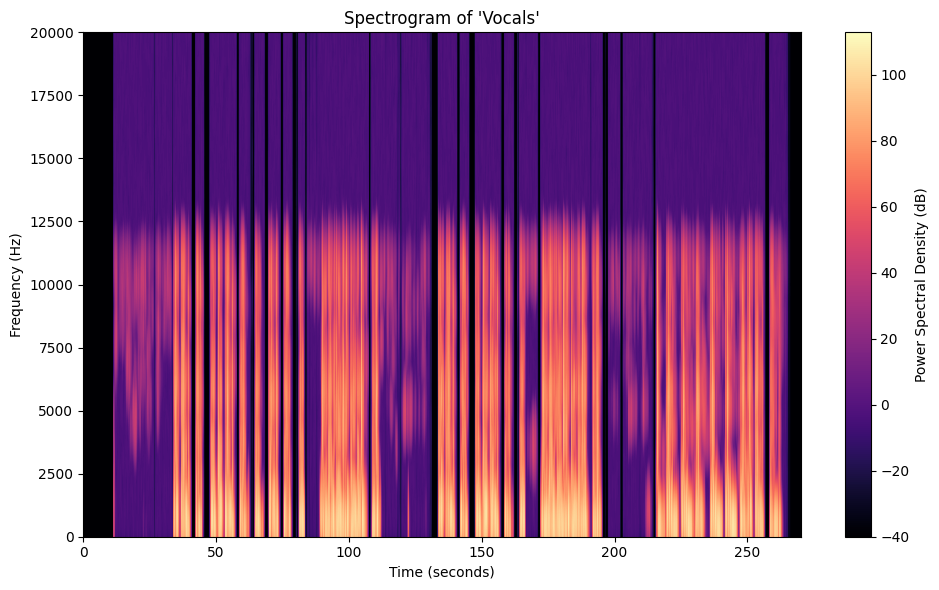

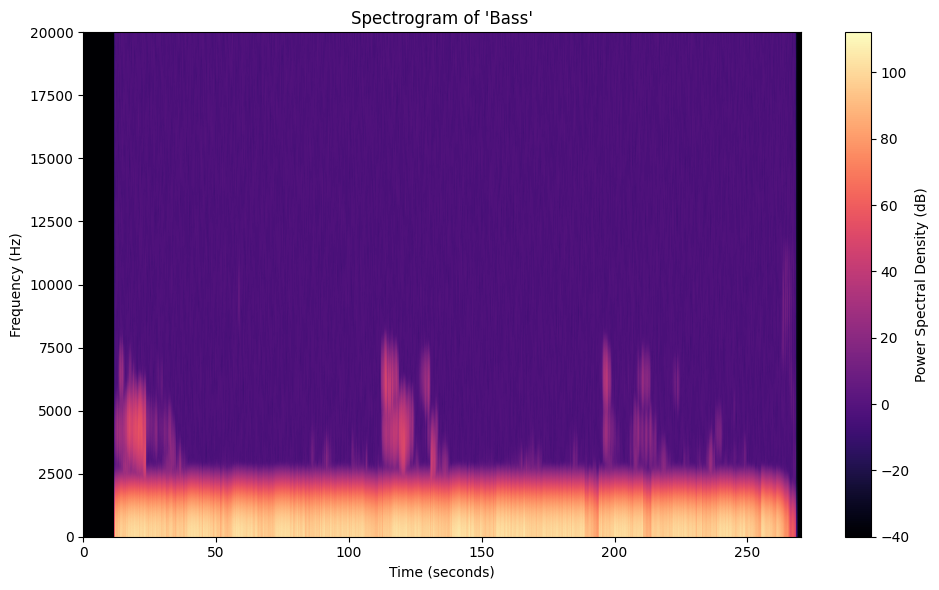

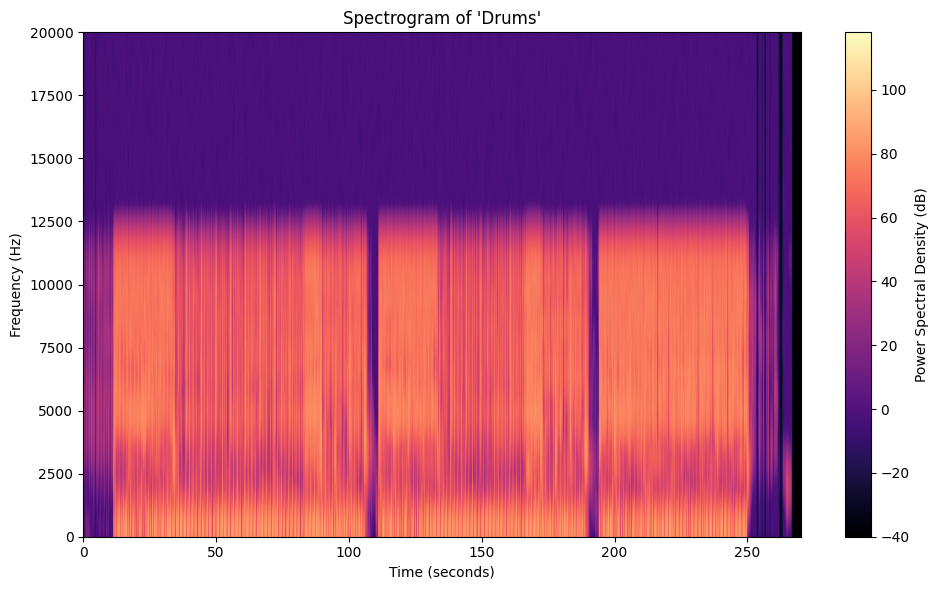

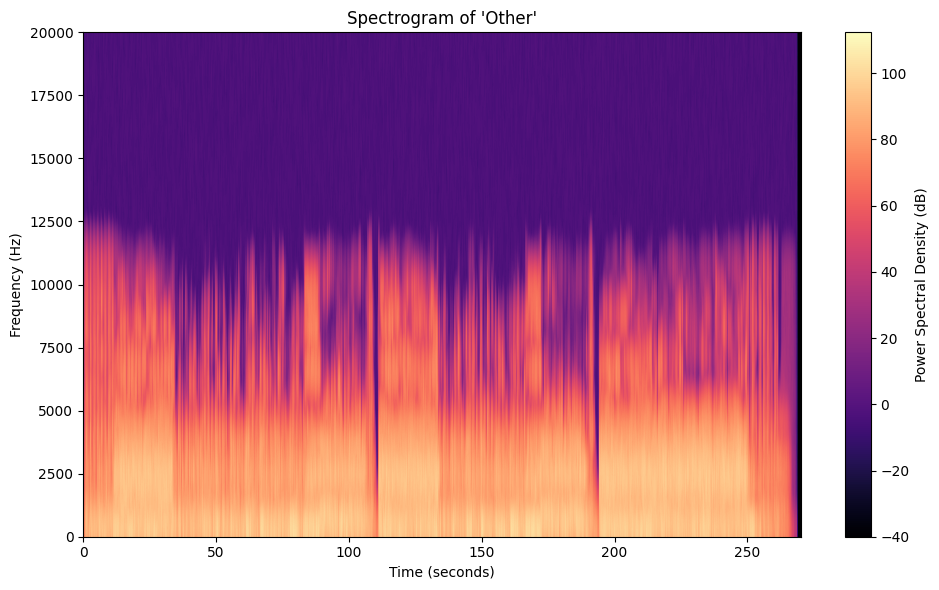

In [3]:
# Install the necessary libraries
!pip install spleeter  # Install the Spleeter library for audio separation
!apt-get install ffmpeg  # Install FFmpeg for handling audio file conversions

# Import the necessary libraries
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import numpy as np  # For numerical operations and array handling
from scipy.fft import fft  # For performing Fast Fourier Transform
from scipy.signal.windows import gaussian  # For generating Gaussian window
from spleeter.separator import Separator  # For separating audio into different stems
from scipy.io import wavfile  # For reading and writing WAV files
import os  # For interacting with the operating system and file paths

# Spleeter separation model configuration
separator = Separator('spleeter:4stems')  # Initialize Spleeter with the 4-stem model (vocals, bass, drums, and other)

# Audio file path
audio_path = '/content/10.Yellow.mp3'  # Specify the path to the audio file to be separated

# Separate the audio into stems
separator.separate_to_file(audio_path, '/content/output')  # Separate the audio into stems and save them in the output directory

# Function to compute and plot the spectrogram
def plot_spectrogram(signal, sr, title):
    mfft = 2048  # Size of the FFT window
    hop_length = 512  # Number of samples to advance for each frame
    g_std = 12  # Standard deviation for the Gaussian window
    gauss_size = mfft  # Size of the Gaussian window
    win = gaussian(gauss_size, std=g_std, sym=True)  # Create the Gaussian window

    # Calculate the number of frames in the signal
    num_frames = 1 + int((len(signal) - mfft) / hop_length)
    Sx2 = np.empty((mfft//2 + 1, num_frames))  # Initialize an array to hold the power spectrum

    # Loop through each frame and compute the FFT
    for i in range(num_frames):
        start_idx = i * hop_length  # Calculate the starting index for the current frame
        end_idx = start_idx + mfft  # Calculate the ending index for the current frame
        windowed_signal = signal[start_idx:end_idx] * win  # Apply the Gaussian window to the current frame
        fft_result = fft(windowed_signal, n=mfft)  # Perform FFT on the windowed signal
        Sx2[:, i] = np.abs(fft_result[:mfft//2 + 1])**2  # Store the squared magnitude of the FFT result

    # Calculate the time and frequency for the spectrogram
    frame_times = np.arange(num_frames) * hop_length / sr  # Calculate time for each frame
    Sx_dB = 10 * np.log10(np.maximum(Sx2, 1e-4))  # Convert power spectrum to decibels

    # Create a plot for the spectrogram
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes
    ax.set_title(f"Spectrogram of '{title}'")  # Set the title of the plot
    ax.set(xlabel="Time (seconds)", ylabel="Frequency (Hz)")  # Set the x and y axis labels
    ax.set_ylim([0, 20000])  # Set the frequency limit to 20 kHz
    time_extent = (0, len(signal) / sr)  # Calculate the extent of time for the x-axis
    freq_extent = (0, sr / 2)  # Calculate the extent of frequency for the y-axis
    im = ax.imshow(Sx_dB, origin='lower', aspect='auto', cmap='magma',
                   extent=[time_extent[0], time_extent[1], freq_extent[0], freq_extent[1]])  # Plot the spectrogram
    fig.colorbar(im, label='Power Spectral Density (dB)')  # Add a colorbar to the plot
    fig.tight_layout()  # Adjust layout to fit the figure
    plt.show()  # Display the plot

# Paths to the output files
output_dir = '/content/output/10.Yellow'  # Directory where the separated stems are saved
stems = ['vocals', 'bass', 'drums', 'other']  # List of stem names to process

# Load and plot the spectrogram for each stem
for stem in stems:
    # Read the WAV file for the current stem
    sample_rate, data = wavfile.read(os.path.join(output_dir, f'{stem}.wav'))  # Load the audio data
    if len(data.shape) > 1:  # Check if the audio is stereo
        data = np.mean(data, axis=1)  # Convert to mono by averaging the channels
    plot_spectrogram(data, sample_rate, stem.capitalize())  # Plot the spectrogram for the stem
